# Machine Learning I (CC2008) - 2022/2023

## Exercise Sheet 3

### Clustering: Methods, Visualization and Validation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

sns.set()

Read the 'supermarket_customers.csv' file into a data frame. Inspect its content

In [31]:
df_customers = pd.read_csv('supermarket_customers.csv')
print(df.shape)
print(df.info())
#df.sample(5)

(2239, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2239 non-null   int64  
 1   Marital_Status     2239 non-null   int64  
 2   NumTotalPurchases  2239 non-null   int64  
 3   TotalAcceptedCmp   2239 non-null   int64  
 4   Kids               2239 non-null   int64  
 5   Day_engaged        2239 non-null   int64  
 6   Expenses           2239 non-null   int64  
 7   Income             2239 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 140.1 KB
None


Apply standardisation to the data set using the 'StandardScaler()' function from sklearn.preprocessing. Consider the dataset regarding columns 'Expenses' and 'Income' only

In [32]:
df_customers_2d = df_customers[['Expenses', 'Income']]

In [33]:
scaler = StandardScaler()
customers_2d_scaled = scaler.fit_transform(df_customers_2d)
df_customers_2d_scaled = pd.DataFrame(customers_2d_scaled)
#df_customers_2d_scaled.describe()

#### K-means

Define the k-means clustering using the function 'KMeans()' from sklearn.cluster with 'n_clusters=3'. Inspect the meaning of the parameter setting init = 'k-means++'. Don't forget to set the seed

In [34]:
k = 3
km = KMeans(n_clusters = k, init = 'k-means++', n_init="auto", random_state = 0)

Fit a k-means model to the scaled data set with the above-defined setting. Inspect the information in 'cluster_centers_' and 'labels_'. Plot the obtained clusters

In [35]:
km.fit(df_customers_2d_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [36]:
km.labels_
km.cluster_centers_

array([[ 0.13777356,  4.6961114 ],
       [-0.71109   , -0.65659129],
       [ 1.03873295,  0.91877988]])

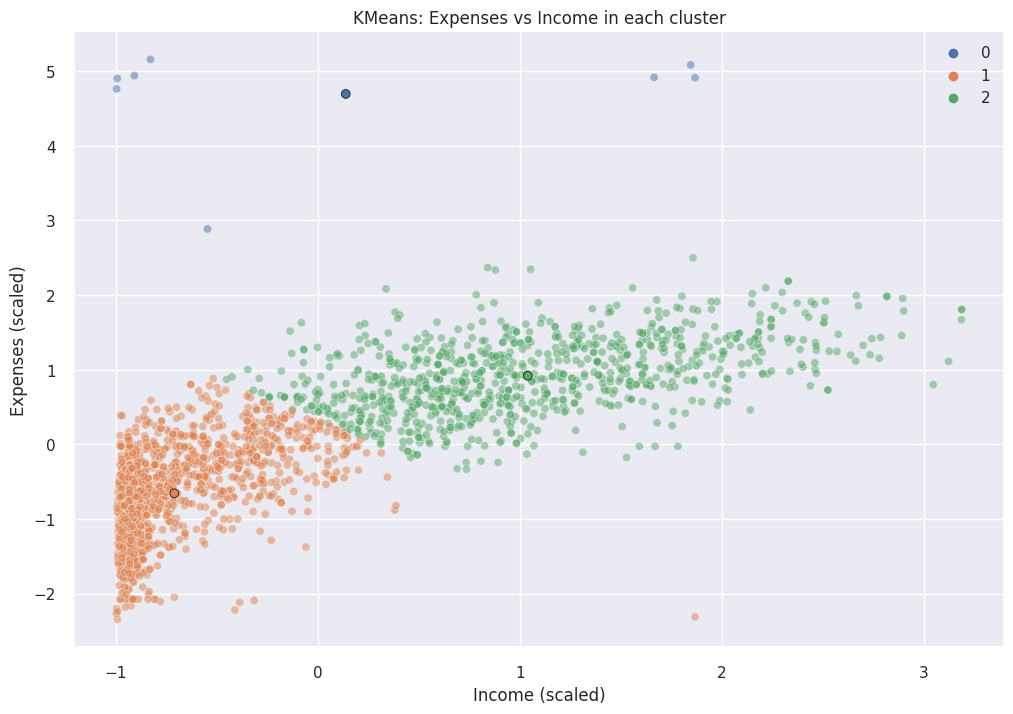

In [37]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(
    x=df_customers_2d_scaled[0],
    y=df_customers_2d_scaled[1],
    hue=km.labels_,
    palette="deep", alpha=0.5
)
ax = sns.scatterplot(
    x=km.cluster_centers_[:,0],
    y=km.cluster_centers_[:,1],
    hue=range(k), palette="deep",
    legend=False, ax=ax, ec="black",
    s = 40
)
plt.xlabel("Income (scaled)")
plt.ylabel("Expenses (scaled)")
plt.title('KMeans: Expenses vs Income in each cluster')
plt.show()

Calculate the average silhouette score for the k-means output using the function 'silhouette_score()' from sklearn.metrics

In [38]:
print("Average silhouette score = ", silhouette_score(df_customers_2d_scaled, km.labels_))

Average silhouette score =  0.5910192516987608


Obtain the silhouette plot through the 'SilhouetteVisualizer()' function from yellowbrick.cluster

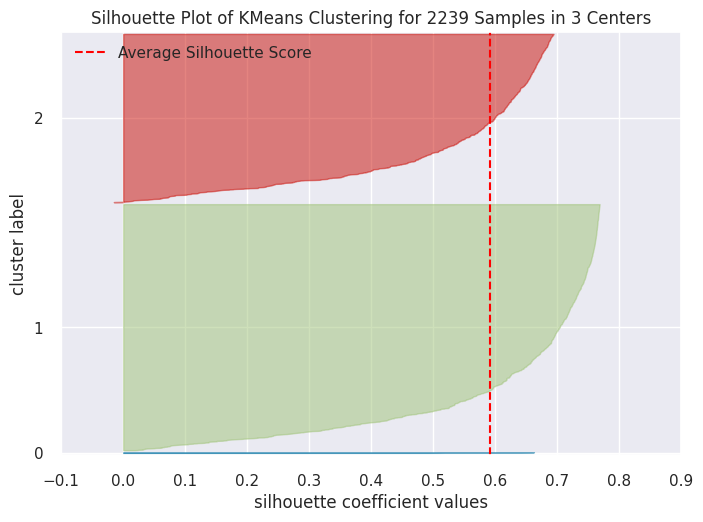

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2239 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df_customers_2d_scaled)
visualizer.show()

Using the elbow method for k ranging from 1 to 20, find out the best number of clusters through the function 'KElbowVisualizer()' from yellowbrick.cluster

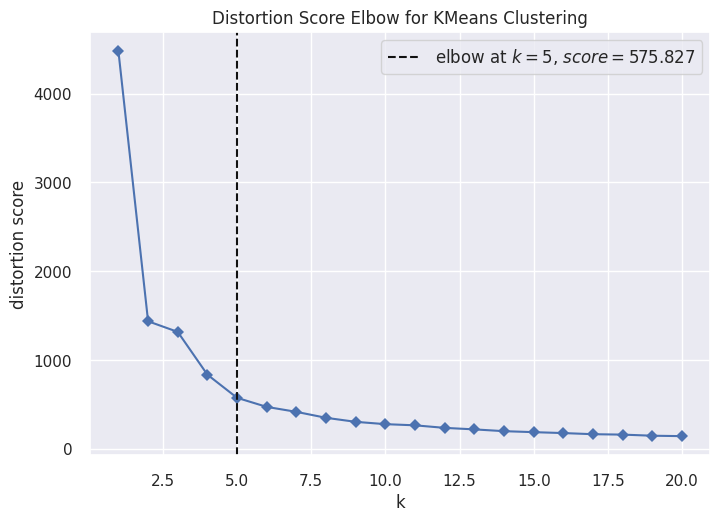

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
visualizer = KElbowVisualizer(km, k=(1,21), timings=False)
visualizer.fit(df_customers_2d_scaled)
visualizer.show()

Fit the k-means algorithm for that number of clusters and plot the obtained clusters

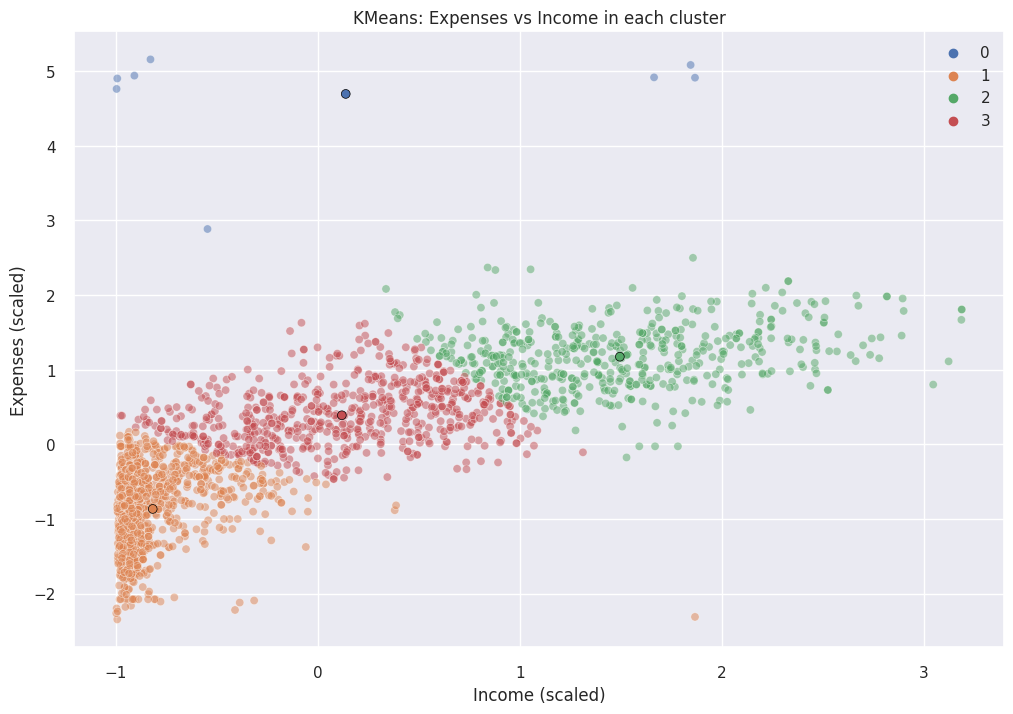

In [42]:
best_k = 4
km = KMeans(n_clusters = best_k, init = "k-means++", n_init="auto", random_state = 0)
km.fit(df_customers_2d_scaled)
#print("Average silhouette score = ", silhouette_score(df_customers_2d_scaled, km.labels_))
plt.figure(figsize=(12,8))
ax = sns.scatterplot(
    x=df_customers_2d_scaled[0],
    y=df_customers_2d_scaled[1],
    hue=km.labels_,
    palette="deep", alpha=0.5
)
ax = sns.scatterplot(
    x=km.cluster_centers_[:,0],
    y=km.cluster_centers_[:,1],
    hue=range(best_k), palette="deep",
    legend=False, ax=ax, ec="black",
    s = 40, markers = "*"
)
plt.xlabel("Income (scaled)")
plt.ylabel("Expenses (scaled)")
plt.title('KMeans: Expenses vs Income in each cluster')
plt.show()

#### DBSCAN

Define the dbscan clustering using the function 'DBSCAN()' from sklearn.cluster with the default settings fro the hyperparameters 'eps' and 'min_samples'

In [43]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

Fit a dbscan model to the scaled data set with the above-defined setting. Plot the obtained clusters

In [47]:
dbscan.fit(df_customers_2d_scaled)
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

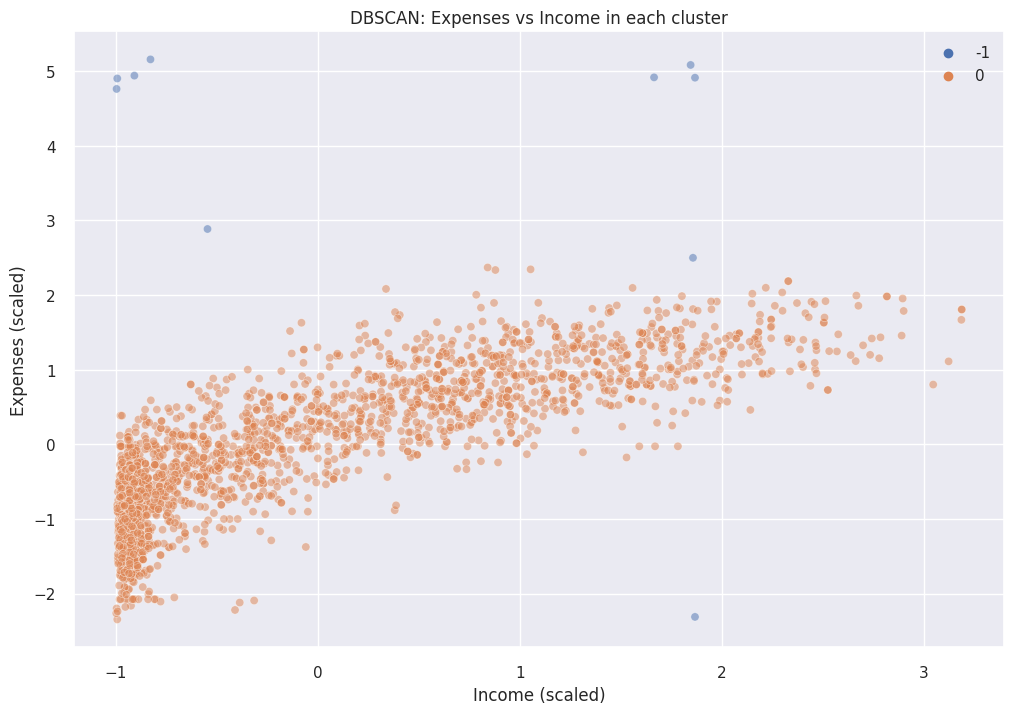

In [48]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(
    x=df_customers_2d_scaled[0],
    y=df_customers_2d_scaled[1],
    hue=dbscan.labels_,
    palette="deep", alpha=0.5
)
plt.xlabel("Income (scaled)")
plt.ylabel("Expenses (scaled)")
plt.title('DBSCAN: Expenses vs Income in each cluster')
plt.show()

Change the values for the parameters 'eps' and 'min_samples' and observe the impact on the constituted clusters

In [49]:
dbscan = DBSCAN(eps=0.75, min_samples=42)
dbscan.fit(df_customers_2d_scaled)
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

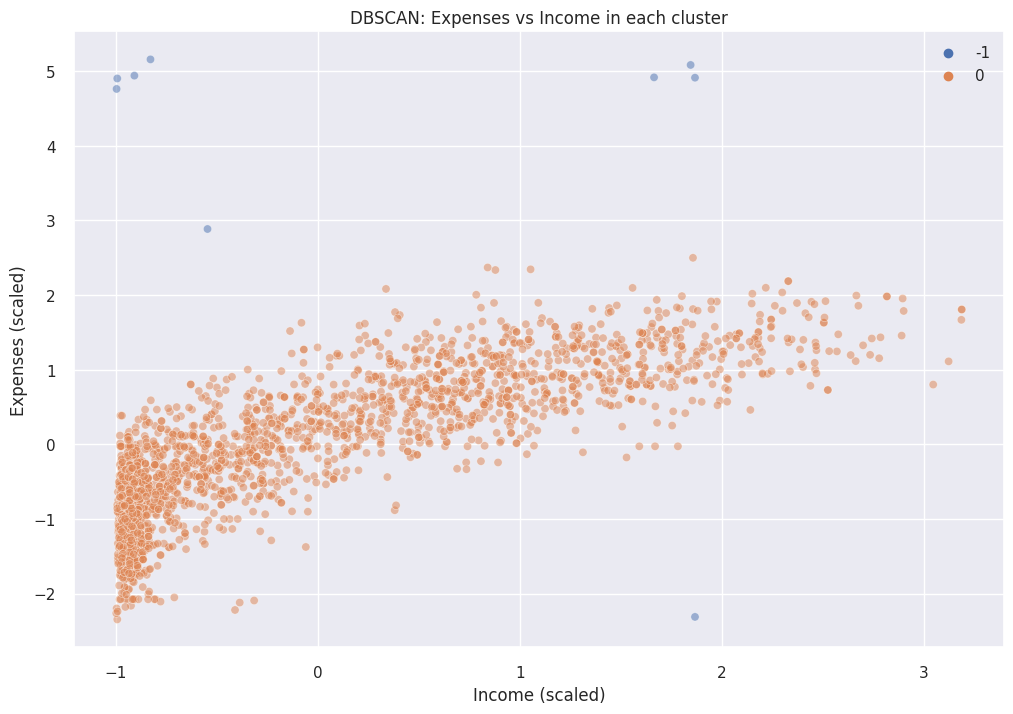

In [50]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(
    x=df_customers_2d_scaled[0],
    y=df_customers_2d_scaled[1],
    hue=dbscan.labels_,
    palette="deep", alpha=0.5
)
plt.xlabel("Income (scaled)")
plt.ylabel("Expenses (scaled)")
plt.title('DBSCAN: Expenses vs Income in each cluster')
plt.show()

#### Agglomerative Hierarchical Clustering

Define the hierarchical clustering using the function 'AgglomerativeClustering()' from sklearn.cluster with n_clusters=3, affinity='euclidean', linkage='complete'

In [51]:
hac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')

Fit a hierarchical clustering model to the scaled data se with the above-defined setting. Plot the obtained clusters

In [52]:
hac.fit(df_customers_2d_scaled)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

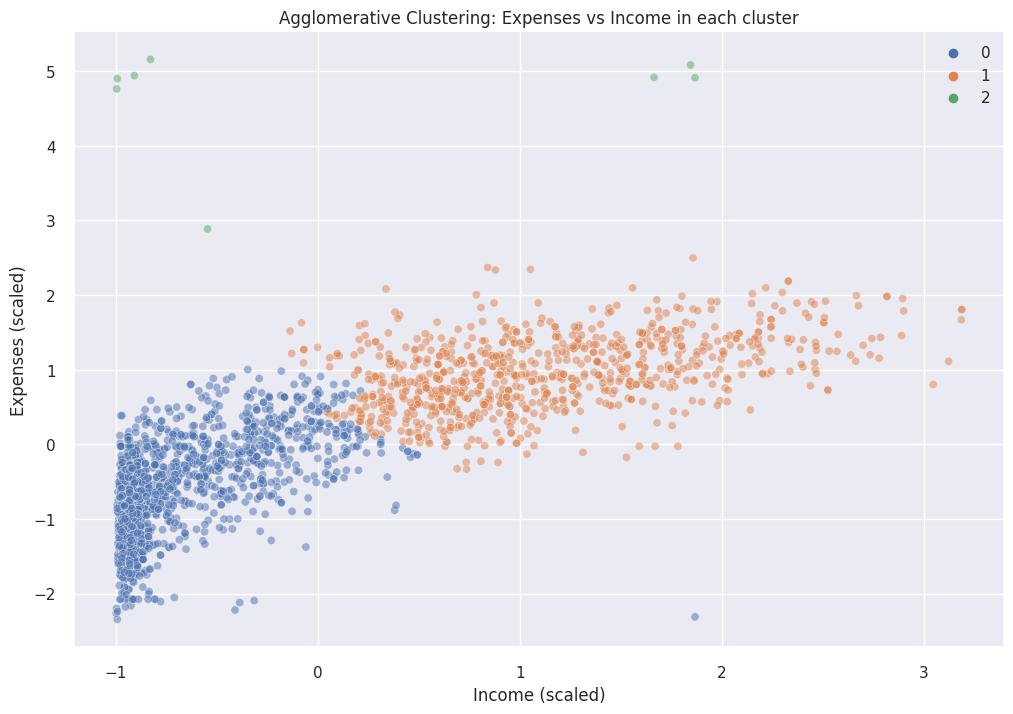

In [54]:
#print("Average silhouette score = ", silhouette_score(df_customers_2d_scaled, hac.labels_))
plt.figure(figsize=(12,8))
ax = sns.scatterplot(
    x=df_customers_2d_scaled[0],
    y=df_customers_2d_scaled[1],
    hue=hac.labels_,
    palette="deep", alpha=0.5
)
plt.xlabel("Income (scaled)")
plt.ylabel("Expenses (scaled)")
plt.title('Agglomerative Clustering: Expenses vs Income in each cluster')
plt.show()

Change the values for the parameters 'linkage' and 'n_clusters' and observe the impact on the constituded clusters

In [56]:
hac = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='single')
hac.fit(df_customers_2d_scaled)

AgglomerativeClustering(linkage='single', metric='euclidean', n_clusters=4)

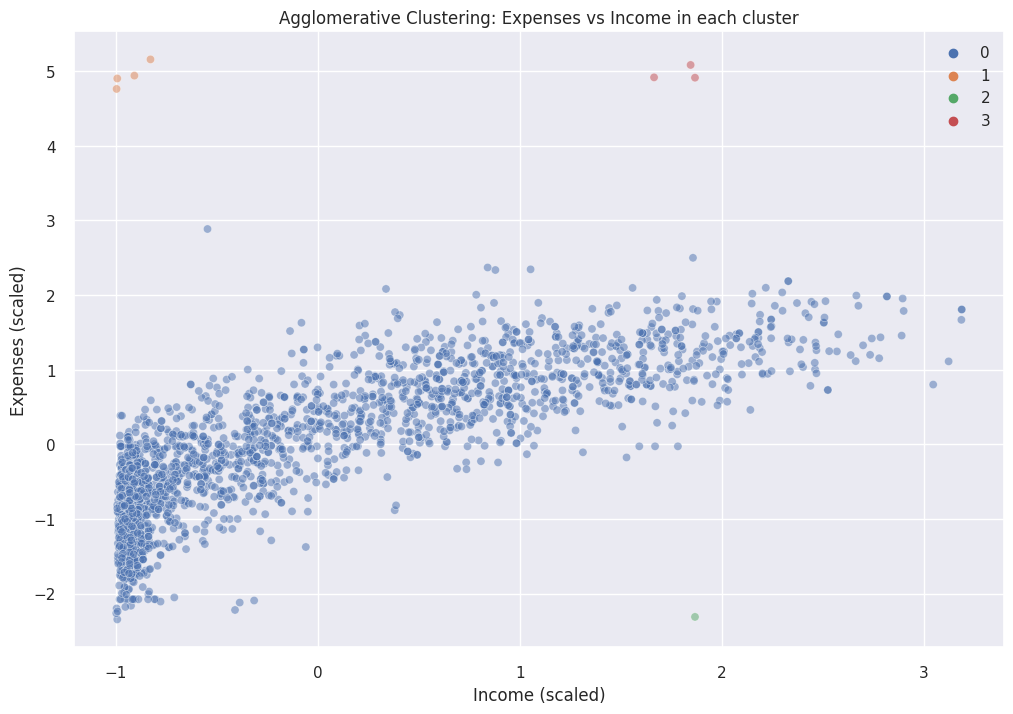

In [58]:
#print("Average silhouette score = ", silhouette_score(df_customers_2d_scaled, hac.labels_))
plt.figure(figsize=(12,8))
ax = sns.scatterplot(
    x=df_customers_2d_scaled[0],
    y=df_customers_2d_scaled[1],
    hue=hac.labels_,
    palette="deep", alpha=0.5
)
plt.xlabel("Income (scaled)")
plt.ylabel("Expenses (scaled)")
plt.title('Agglomerative Clustering: Expenses vs Income in each cluster')
plt.show()

Now, consider the original scaled data frame

In [60]:
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(df_customers)
df_customers_scaled = pd.DataFrame(customers_scaled)
#df_customers_scaled.sample(5)

Fit clustering models using k-means, dbscan and agglomerative hierarchical clustering algorithms. Define a function to visualize the output of a clustering algorithm that receives the dataset and the fitted clusters and plots, by a scatter plot, the two first principal components of the data set and the associated clusters. You should use the function 'PCA()' from sklearn.decomposition, a dimensionality reduction technique, to obtain the two principal components. To better understand the formed clusters, you can perform some explorary data analysis on each cluster's subset of data

In [64]:
def visualize_clusters(data, cluster_out, clust_alg=""):
    pca = PCA()
    pca.fit(data)
    data_pca = pca.transform(data)
    sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1],
                    hue=cluster_out.labels_,
                    palette="deep", alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(clust_alg + ' Clustering with PCA visualization')
    plt.show()

In [65]:
k = 3
km = KMeans(n_clusters = k, init="k-means++", n_init='auto', random_state = 0)
km.fit(df_customers_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=0)

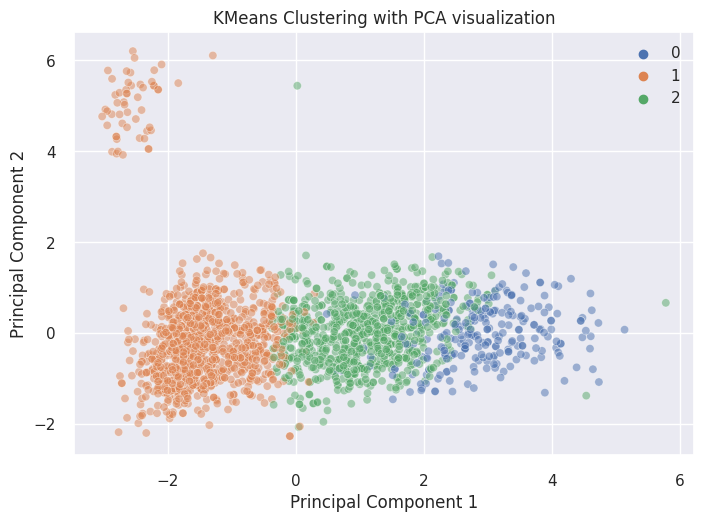

In [66]:
visualize_clusters(df_customers_scaled, km, "KMeans")

In [67]:
df_customers_kmeans = df_customers.copy()
df_customers_kmeans['Cluster'] = km.labels_
df_customers_kmeans['Cluster'].value_counts()

1    1139
2     840
0     260
Name: Cluster, dtype: int64

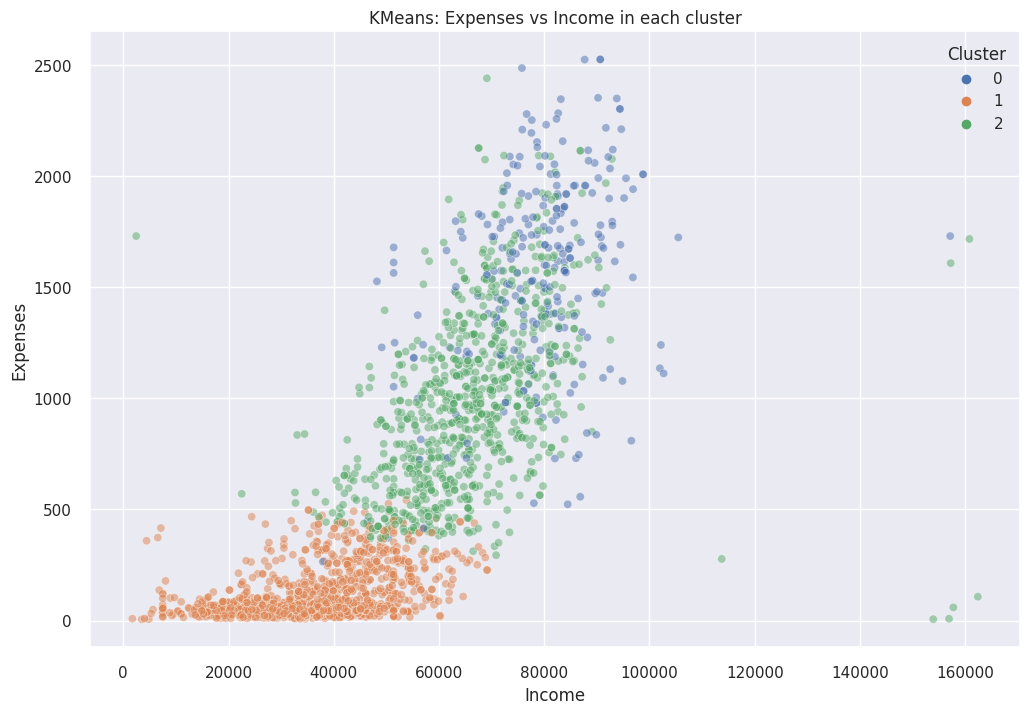

In [68]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(
    x=df_customers_kmeans['Income'],
    y=df_customers_kmeans['Expenses'],
    hue=df_customers_kmeans['Cluster'],
    palette="deep", alpha=0.5
)
plt.title('KMeans: Expenses vs Income in each cluster')
plt.show()

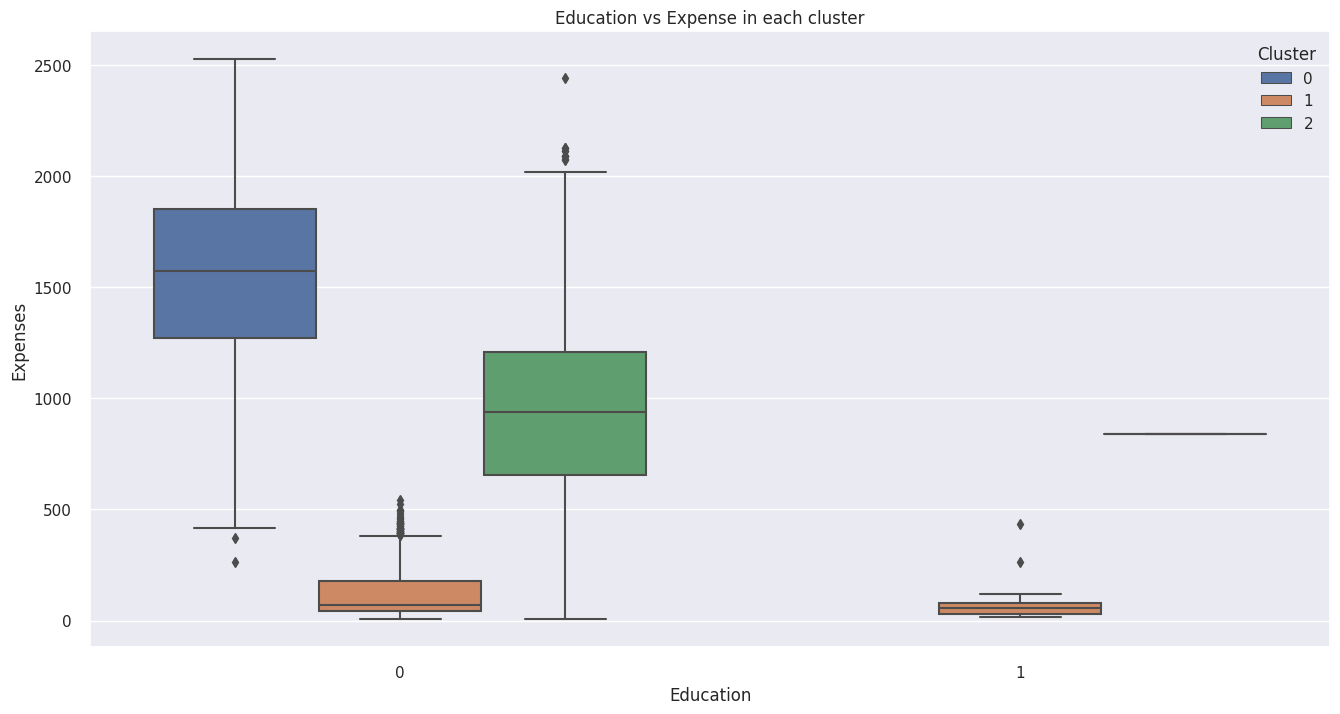

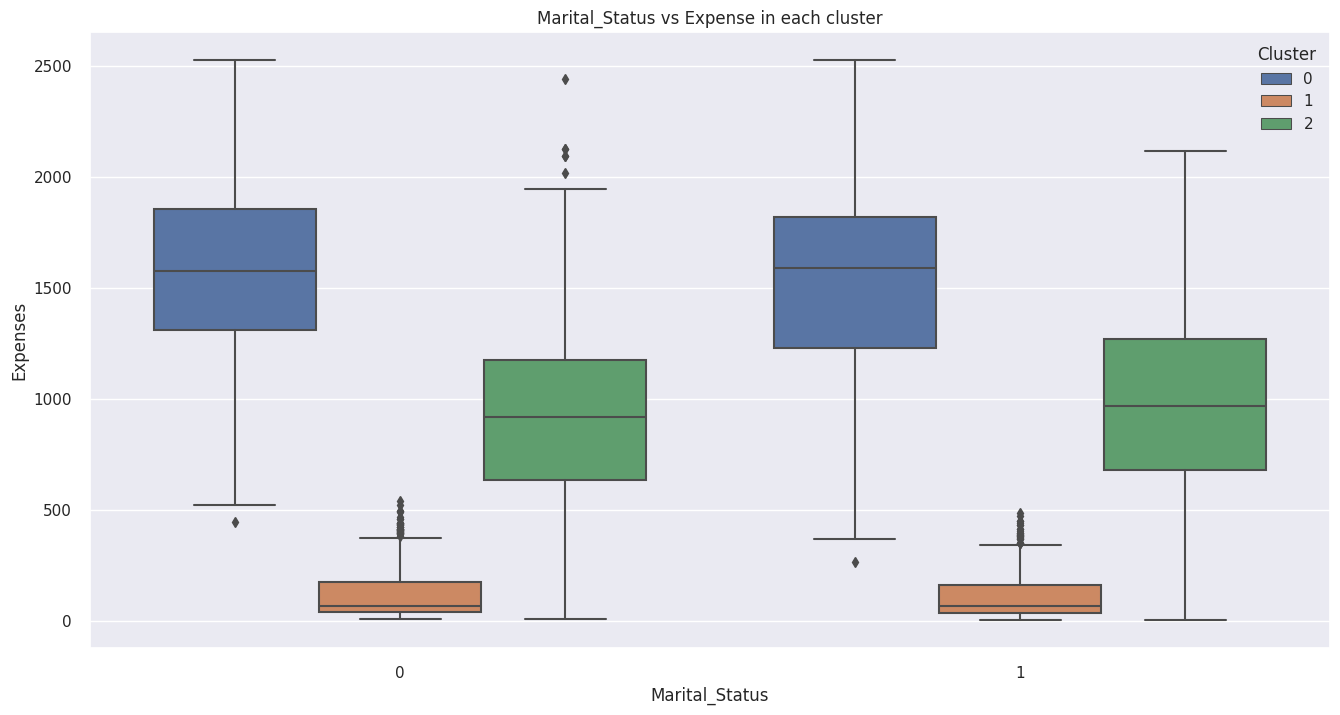

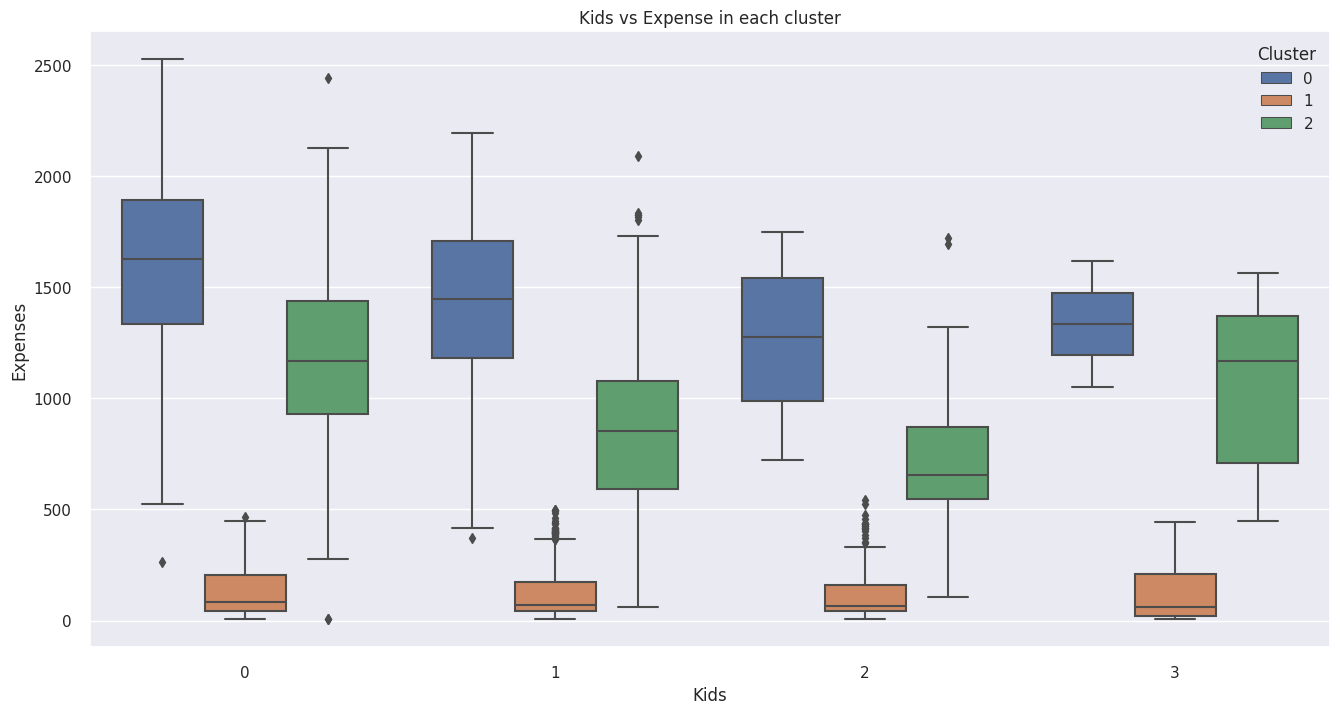

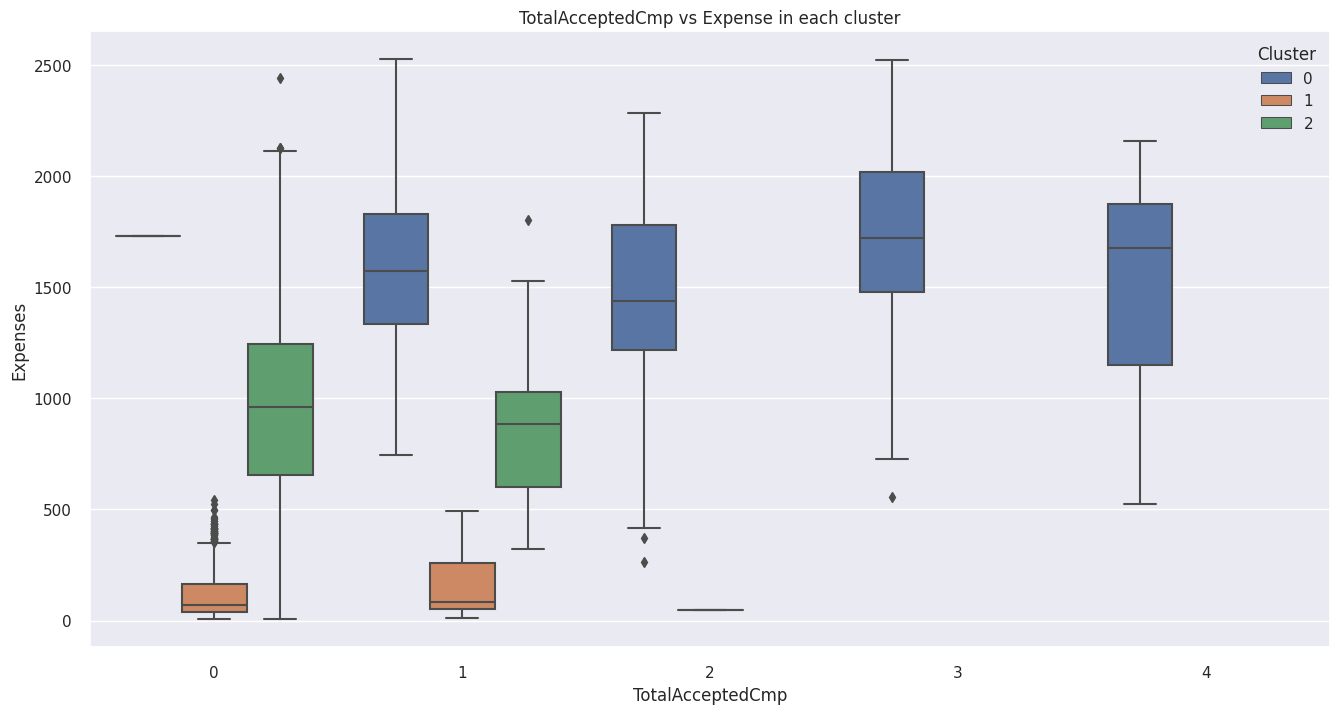

In [69]:
for col in ['Education', 'Marital_Status', 'Kids', 'TotalAcceptedCmp']:
    plt.figure(figsize=(16,8))
    sns.boxplot(
        x=df_customers_kmeans[col],
        y=df_customers_kmeans['Expenses'],
        hue=df_customers_kmeans['Cluster'],
        palette="deep"
    )
    plt.title(col + ' vs Expense in each cluster')
    plt.show()

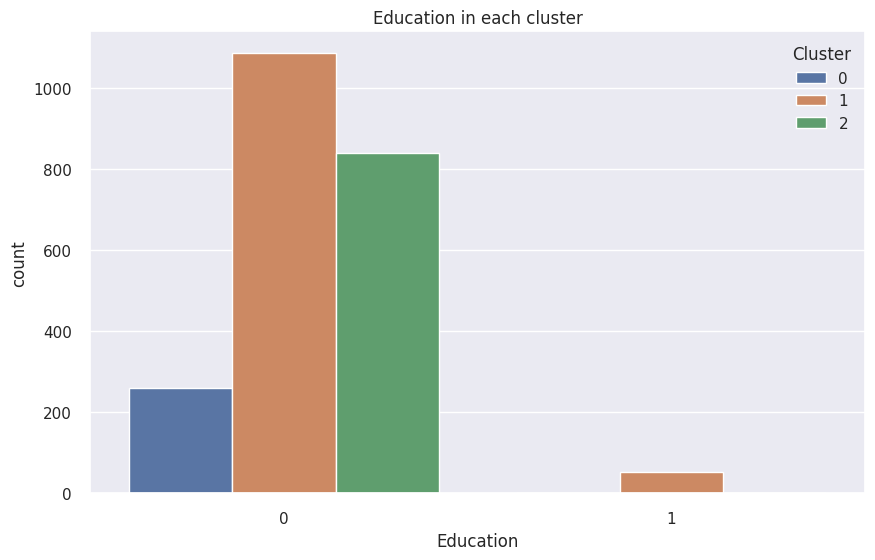

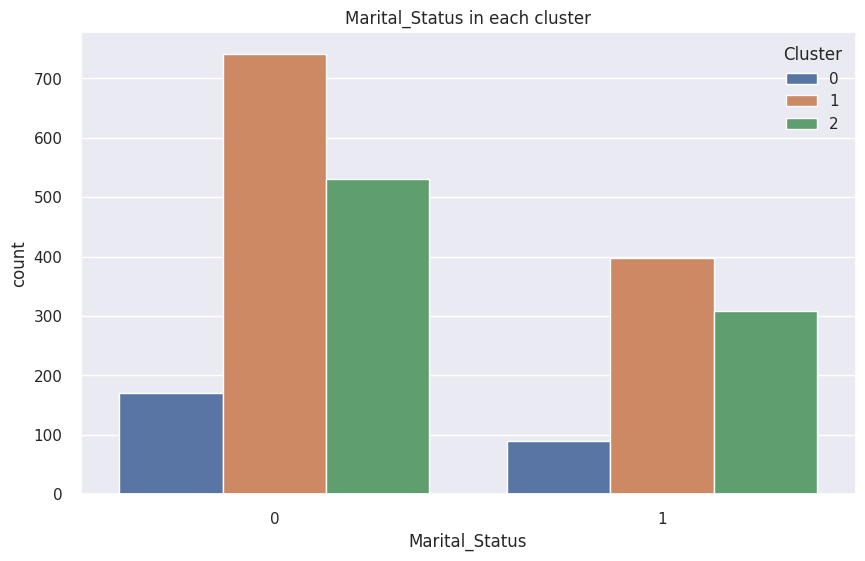

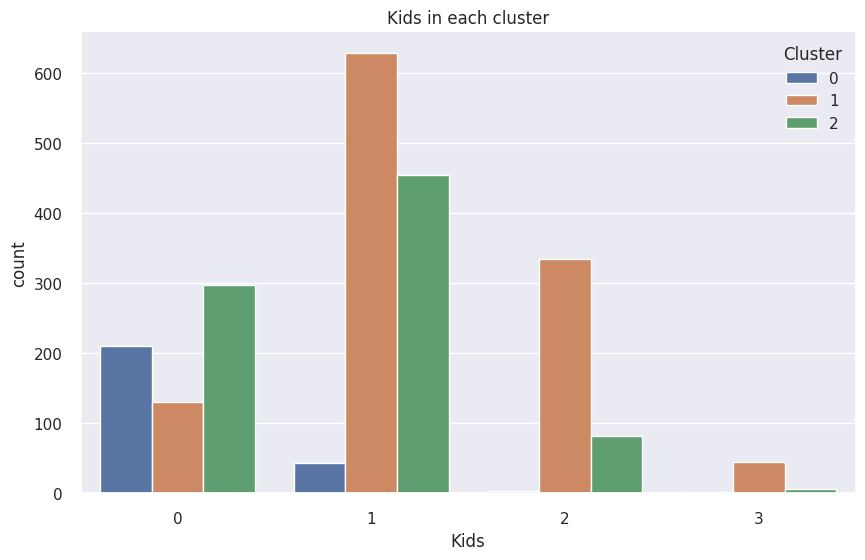

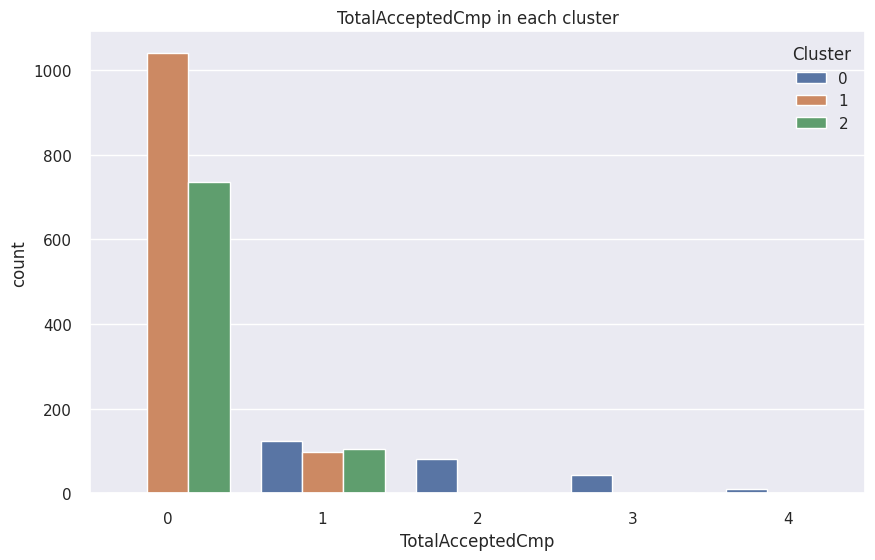

In [70]:
for col in ['Education', 'Marital_Status', 'Kids', 'TotalAcceptedCmp']:
    plt.figure(figsize=(10,6))
    sns.countplot(
        x=df_customers_kmeans[col],
        hue=df_customers_kmeans['Cluster'],
        palette="deep"
    )
    plt.title(col + ' in each cluster')
    plt.show()

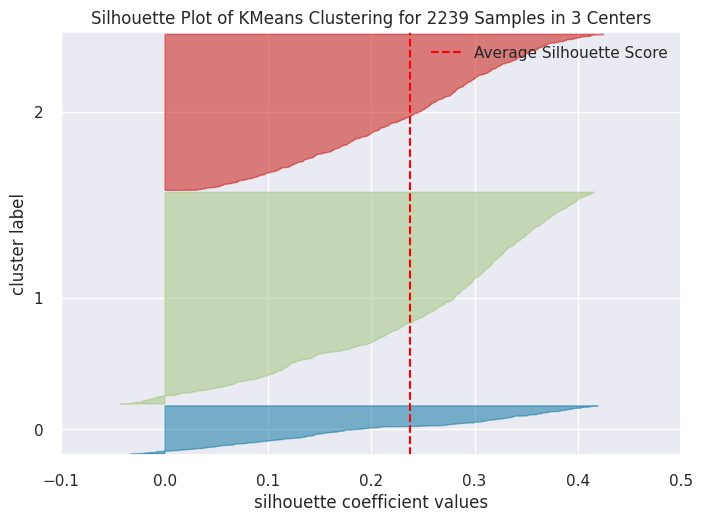

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2239 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [72]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df_customers_scaled)
visualizer.show()

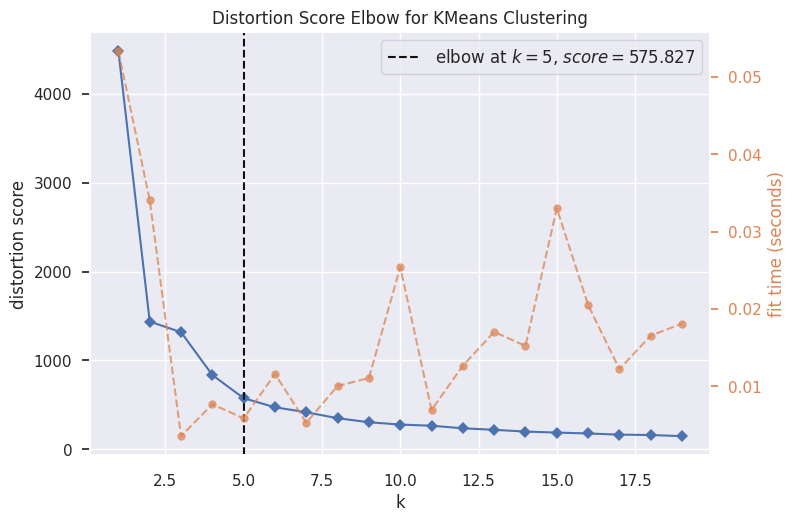

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
visualizer = KElbowVisualizer(km, k=(1,20), timing=False)
visualizer.fit(df_customers_2d_scaled)
visualizer.show()

In [74]:
best_k = 4
km = KMeans(n_clusters = best_k, init = 'k-means++', n_init='auto', random_state=0)
km.fit(df_customers_scaled)

KMeans(n_clusters=4, n_init='auto', random_state=0)

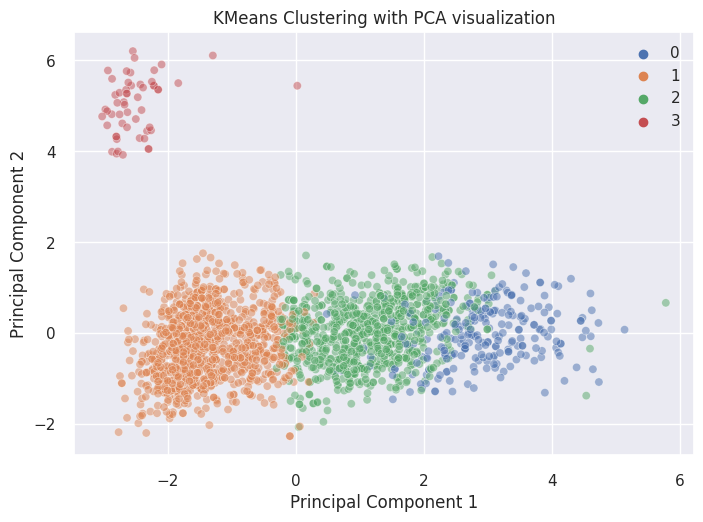

In [75]:
visualize_clusters(df_customers_scaled, km, "KMeans")

In [79]:
silhouette_scores = []

for eps in [0.9, 1.1, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5]:
    for minPts in [5, 10, 20, 50]:
        dbscan = DBSCAN(eps=eps, min_samples=minPts)
        dbscan.fit(df_customers_scaled)
        labels = dbscan.labels_
        s = silhouette_score(df_customers_scaled, labels)
        print("For eps = ", eps, "minPts = ", minPts, "silhouette score = ", round(s,2))
        silhouette_scores.append(s)
        
#print(silhouette_scores)

For eps =  0.9 minPts =  5 silhouette score =  -0.02
For eps =  0.9 minPts =  10 silhouette score =  -0.05
For eps =  0.9 minPts =  20 silhouette score =  -0.06
For eps =  0.9 minPts =  50 silhouette score =  -0.04
For eps =  1.1 minPts =  5 silhouette score =  0.03
For eps =  1.1 minPts =  10 silhouette score =  0.0
For eps =  1.1 minPts =  20 silhouette score =  -0.01
For eps =  1.1 minPts =  50 silhouette score =  -0.05
For eps =  1.5 minPts =  5 silhouette score =  0.16
For eps =  1.5 minPts =  10 silhouette score =  0.18
For eps =  1.5 minPts =  20 silhouette score =  0.17
For eps =  1.5 minPts =  50 silhouette score =  0.17
For eps =  1.7 minPts =  5 silhouette score =  0.19
For eps =  1.7 minPts =  10 silhouette score =  0.18
For eps =  1.7 minPts =  20 silhouette score =  0.18
For eps =  1.7 minPts =  50 silhouette score =  0.18
For eps =  1.9 minPts =  5 silhouette score =  0.19
For eps =  1.9 minPts =  10 silhouette score =  0.19
For eps =  1.9 minPts =  20 silhouette score =

In [81]:
best_eps = 2.5
best_minPts = 50
dbscan = DBSCAN(eps=best_eps, min_samples=best_minPts)
dbscan.fit(df_customers_scaled)
#print(len(dbscan.core_sample_indices_))

DBSCAN(eps=2.5, min_samples=50)

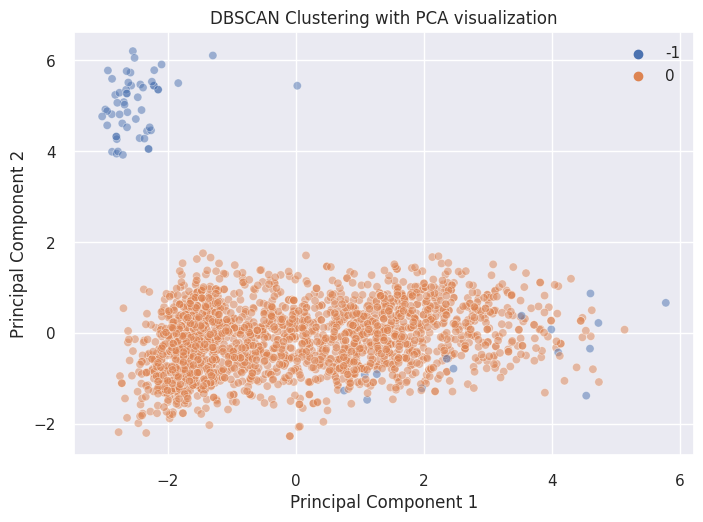

In [82]:
visualize_clusters(df_customers_scaled, dbscan, "DBSCAN")

In [83]:
hac = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
hac.fit(df_customers_scaled)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=4)

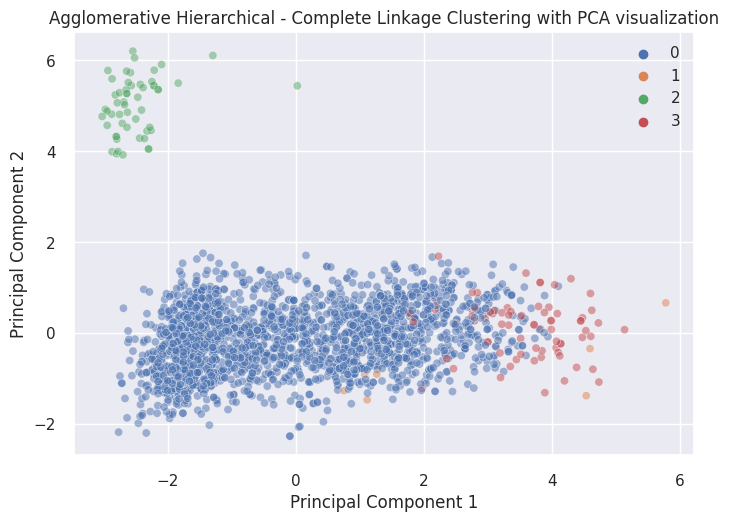

In [84]:
visualize_clusters(df_customers_scaled, hac, "Agglomerative Hierarchical - Complete Linkage")

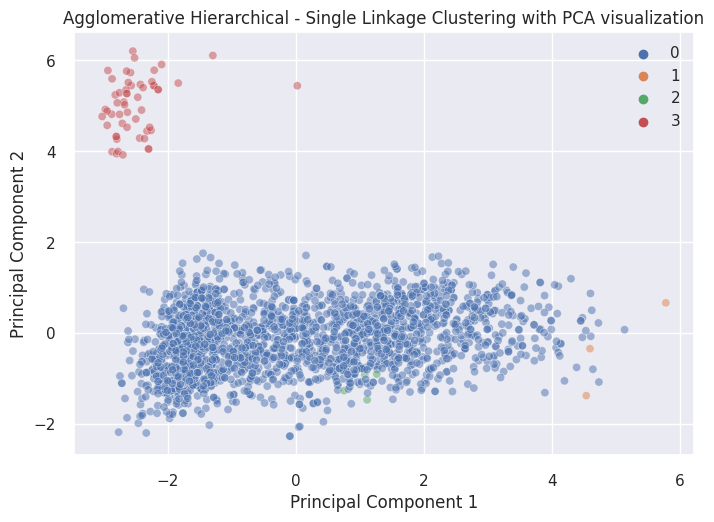

In [85]:
hac = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='single')
hac.fit(df_customers_scaled)
visualize_clusters(df_customers_scaled, hac, "Agglomerative Hierarchical - Single Linkage")

In [86]:
for nclusters in range (2,11):
    hac = AgglomerativeClustering(n_clusters=nclusters, metric='euclidean', linkage='complete')
    hac.fit(df_customers_scaled)
    s = silhouette_score(df_customers_scaled, hac.labels_)
    print("For nclusters = ", nclusters, "silhouette score =", round(s,2))

For nclusters =  2 silhouette score = 0.37
For nclusters =  3 silhouette score = 0.4
For nclusters =  4 silhouette score = 0.39
For nclusters =  5 silhouette score = 0.1
For nclusters =  6 silhouette score = 0.1
For nclusters =  7 silhouette score = 0.16
For nclusters =  8 silhouette score = 0.16
For nclusters =  9 silhouette score = 0.13
For nclusters =  10 silhouette score = 0.11


In [87]:
for nclusters in range (2,11):
    hac = AgglomerativeClustering(n_clusters=nclusters, metric='euclidean', linkage='single')
    hac.fit(df_customers_scaled)
    s = silhouette_score(df_customers_scaled, hac.labels_)
    print("For nclusters = ", nclusters, "silhouette score =", round(s,2))

For nclusters =  2 silhouette score = 0.54
For nclusters =  3 silhouette score = 0.44
For nclusters =  4 silhouette score = 0.41
For nclusters =  5 silhouette score = 0.34
For nclusters =  6 silhouette score = 0.29
For nclusters =  7 silhouette score = 0.28
For nclusters =  8 silhouette score = 0.28
For nclusters =  9 silhouette score = 0.27
For nclusters =  10 silhouette score = 0.25
